# Final Project - Sudhakar Balakrishnan - 10/26/2019

__Dataset:__ _News Popularity in Multiple Social Media Platforms Data Set_
URL: https://archive.ics.uci.edu/ml/datasets/News+Popularity+in+Multiple+Social+Media+Platforms

__Description:__

This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.
The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: economy, microsoft, obama and palestine.
This data set is tailored for evaluative comparisons in predictive analytics tasks, although allowing for tasks in other research areas such as topic detection and tracking, sentiment analysis in short text, first story detection or news recommendation.

### Project Focus:

_Study the dataset related to Economy topic.  And find out which platform has higher user engagement, so that the ad expenditure is invested wisely._

In [3]:
##################
#
# VARIABLES OF NEWS DATA
#
# IDLink (numeric): Unique identifier of news items
# Title (string): Title of the news item according to the official media sources
# Headline (string): Headline of the news item according to the official media sources
# Source (string): Original news outlet that published the news item
# Topic (string): Query topic used to obtain the items in the official media sources
# PublishDate (timestamp): Date and time of the news items' publication
# SentimentTitle (numeric): Sentiment score of the text in the news items' title
# SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
# Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
# GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
# LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn
#
##################

In [4]:
##################
#
# VARIABLES OF SOCIAL FEEDBACK DATA
#
# IDLink (numeric): Unique identifier of news items
# TS1 (numeric): Level of popularity in time slice 1 (0-20 minutes upon publication)
# TS2 (numeric): Level of popularity in time slice 2 (20-40 minutes upon publication)
# TS... (numeric): Level of popularity in time slice ...
# TS144 (numeric): Final level of popularity after 2 days upon publication
#
##################

__Step1:__
- Perform Data cleansing if required
- Load the News Data
- Filter for Economy subset

In [5]:
import matplotlib.pyplot as plt
import statistics as stats
%matplotlib notebook

In [59]:
import csv

def read_news_file(file_name, max_rows=0, delimiter=','):
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=delimiter)
        line_count = 0
        records = []
        header = next(csv_reader)
        del header[2] ## Remove the headline string, not used for this study.
        for row in csv_reader:
            
            # convert types
            row[0] = int(row[0]) if row[0] != None else 0
            ## col 1 through 5 keep them as string
            row[6] = float(row[6]) if row[6] != None else 0.0
            row[7] = float(row[7]) if row[7] != None else 0.0
            row[8] = int(row[8]) if row[8] != None else 0
            row[9] = int(row[9]) if row[9] != None else 0
            row[10] = int(row[10]) if row[10] != None else 0
            del row[2] ## Remove the headline string, not used for this study.
            
            # save to array
            records.append(row)
            
            # increment loop and exit if required
            line_count += 1
            if max_rows != 0 and line_count >= max_rows:
                break
        return records, header

In [60]:
# header = ['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate', 'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus', 'LinkedIn']

news, header = read_news_file("News_Final_comma.csv", 0, ',')
print("File Header:\n", header)

print("\nNews Array (First 5 Rows):\n")
for s in news[0:5]:
    print(s)

print("\nTotal Records: ", len(news))

File Header:
 ['IDLink', 'Title', 'Source', 'Topic', 'PublishDate', 'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus', 'LinkedIn']

News Array (First 5 Rows):

[99248, 'Obama Lays Wreath at Arlington National Cemetery', 'USA TODAY', 'obama', '2002-04-02 00:00:00', 0.0, -0.0533001790889026, -1, -1, -1]
[10423, 'A Look at the Health of the Chinese Economy', 'Bloomberg', 'economy', '2008-09-20 00:00:00', 0.208333333333333, -0.156385810542806, -1, -1, -1]
[18828, 'Nouriel Roubini: Global Economy Not Back to 2008', 'Bloomberg', 'economy', '2012-01-28 00:00:00', -0.425210032135381, 0.139754248593737, -1, -1, -1]
[27788, 'Finland GDP Expands In Q4', 'RTT News', 'economy', '2015-03-01 00:06:00', 0.0, 0.0260643017571343, -1, -1, -1]
[27789, 'Tourism, govt spending buoys Thai economy in January', 'The Nation - Thailand&#39;s English news', 'economy', '2015-03-01 00:11:00', 0.0, 0.141084456488315, -1, -1, -1]

Total Records:  93239


In [129]:
# Define all common utility methods

def filter_by_1_column_equals(arr, col, value):
    return list(filter(lambda x: x[col] == value, arr))

def filter_by_1_column_less_equals(arr, col, value):
    return list(filter(lambda x: x[col] <= value, arr))

def filter_by_3_columns_not_equals(arr, col1, value1, col2, value2, col3, value3):
    return list(filter(lambda x: x[col1] != value1 and x[col2] != value2 and x[col3] != value3, arr))

def get_list_column(arr, column):
    return [x[column] for x in arr]

In [112]:
economy_news = filter_by_1_column_equals(news, header.index('Topic'), 'economy')

print("\nEconomy News Array (First 5 Rows):\n")
for s in economy_news[0:5]:
    print(s)

print("\nTotal Records: ", len(economy_news))


Economy News Array (First 5 Rows):

[10423, 'A Look at the Health of the Chinese Economy', 'Bloomberg', 'economy', '2008-09-20 00:00:00', 0.208333333333333, -0.156385810542806, -1, -1, -1]
[18828, 'Nouriel Roubini: Global Economy Not Back to 2008', 'Bloomberg', 'economy', '2012-01-28 00:00:00', -0.425210032135381, 0.139754248593737, -1, -1, -1]
[27788, 'Finland GDP Expands In Q4', 'RTT News', 'economy', '2015-03-01 00:06:00', 0.0, 0.0260643017571343, -1, -1, -1]
[27789, 'Tourism, govt spending buoys Thai economy in January', 'The Nation - Thailand&#39;s English news', 'economy', '2015-03-01 00:11:00', 0.0, 0.141084456488315, -1, -1, -1]
[27838, 'Greek economy grows 0.1 pct q/q in fourth quarter', 'Reuters via Yahoo! Finance', 'economy', '2015-03-01 02:16:00', 0.0, -0.375259329232792, -1, -1, -1]

Total Records:  33928


__Step2:__
- Plot 2D chart for popularity of each News on platforms (Facebook/Googleplus/LinkedIn)

In [109]:
# Prepare data for 2D chart

news_ids = get_list_column(economy_news, header.index('IDLink'))
facebook_popularity = get_list_column(economy_news, header.index('Facebook'))
google_popularity = get_list_column(economy_news, header.index('GooglePlus'))
linkedin_popularity = get_list_column(economy_news, header.index('LinkedIn'))

print("News ID's: ", len(news_ids), news_ids[0:5])
print("Facebook Popularity: ", len(facebook_popularity), facebook_popularity[0:5])
print("GooglePlus Popularity: ", len(google_popularity), google_popularity[0:5])
print("LinkedIn Popularity: ", len(linkedin_popularity), linkedin_popularity[0:5])

News ID's:  33928 [10423, 18828, 27788, 27789, 27838]
Facebook Popularity:  33928 [-1, -1, -1, -1, -1]
GooglePlus Popularity:  33928 [-1, -1, -1, -1, -1]
LinkedIn Popularity:  33928 [-1, -1, -1, -1, -1]


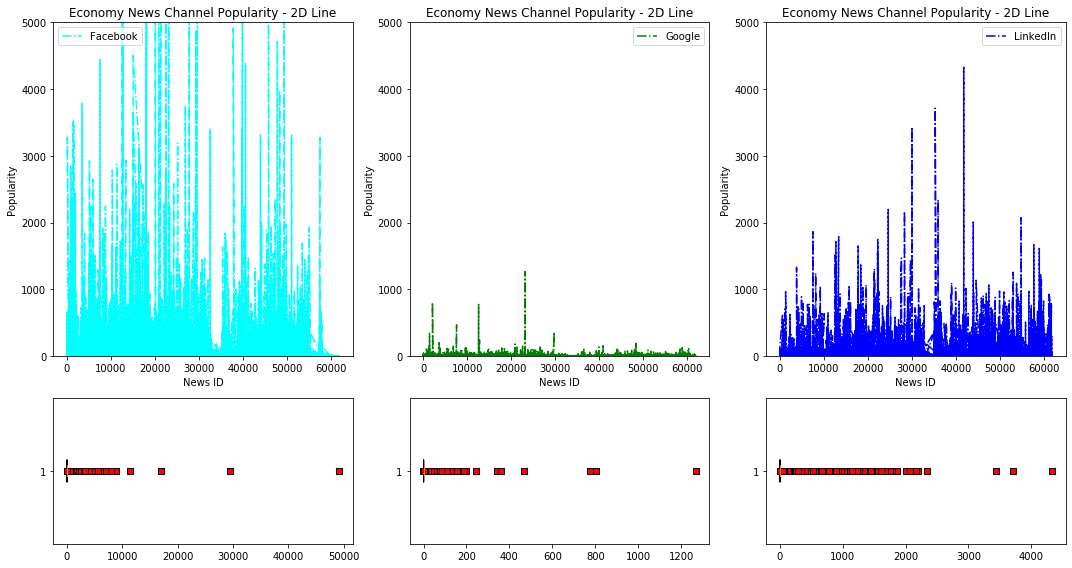

In [118]:
# Plot 2D chart
plt.rcParams.update({'figure.autolayout': True})

def plot_custom_2d_chart(ax, x_array, y_array, label, color, ylimit):
    ax.set_title('Economy News Channel Popularity - 2D Line')
    ax.set_xlabel('News ID')
    ax.set_ylabel('Popularity')
    ax.plot(x_array, y_array, label=label, color=color, linestyle='-.')
    ax.set_ylim(0, ylimit)
    ax.legend()
    
def plot_custom_box_chart(ax, data):
    red_square = dict(markerfacecolor='r', marker='s')
    ax.boxplot(data, notch=True, flierprops=red_square, vert=False, whis=0.75)
    
plt.close('all')
#fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 1), rowspan=2)
ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0), rowspan=1)
ax5 = plt.subplot2grid((3, 3), (2, 1), rowspan=1)
ax6 = plt.subplot2grid((3, 3), (2, 2), rowspan=1)

plot_custom_2d_chart(ax1, news_ids, facebook_popularity, 'Facebook', 'cyan', 5000)
plot_custom_2d_chart(ax2, news_ids, google_popularity, 'Google', 'green', 5000)
plot_custom_2d_chart(ax3, news_ids, linkedin_popularity, 'LinkedIn', 'blue', 5000)

plot_custom_box_chart(ax4, facebook_popularity)
plot_custom_box_chart(ax5, google_popularity)
plot_custom_box_chart(ax6, linkedin_popularity)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

__My Observation:__
- Looking at the BoxPlot median value
-- we can conclude the dataset is skewed or biased due existence too many -1 or 0 values.
- Next step, lets remove data points if all 3 platforms have value of -1 or 0.

In [115]:
# Filter economy_news data set if all 3 platform has no feedback (the total outliers)
economy_news_filtered = filter_by_3_columns_not_equals(economy_news, header.index('Facebook'), -1,
                                            header.index('GooglePlus'), -1,
                                            header.index('LinkedIn'), -1)

economy_news_filtered = filter_by_3_columns_not_equals(economy_news_filtered, header.index('Facebook'), 0,
                                            header.index('GooglePlus'), 0,
                                            header.index('LinkedIn'), 0)
# Prepare data for 2D chart

news_ids2 = get_list_column(economy_news_filtered, header.index('IDLink'))
facebook_popularity2 = get_list_column(economy_news_filtered, header.index('Facebook'))
google_popularity2 = get_list_column(economy_news_filtered, header.index('GooglePlus'))
linkedin_popularity2 = get_list_column(economy_news_filtered, header.index('LinkedIn'))

print("News ID's: ", len(news_ids2), news_ids2[0:5])
print("Facebook Popularity: ", len(facebook_popularity2), facebook_popularity2[0:5])
print("GooglePlus Popularity: ", len(google_popularity2), google_popularity2[0:5])
print("LinkedIn Popularity: ", len(linkedin_popularity2), linkedin_popularity2[0:5])


News ID's:  7089 [292, 15, 16, 25, 38]
Facebook Popularity:  7089 [27, 127, 8, 31, 20]
GooglePlus Popularity:  7089 [2, 2, 3, 7, 8]
LinkedIn Popularity:  7089 [22, 55, 6, 3, 74]


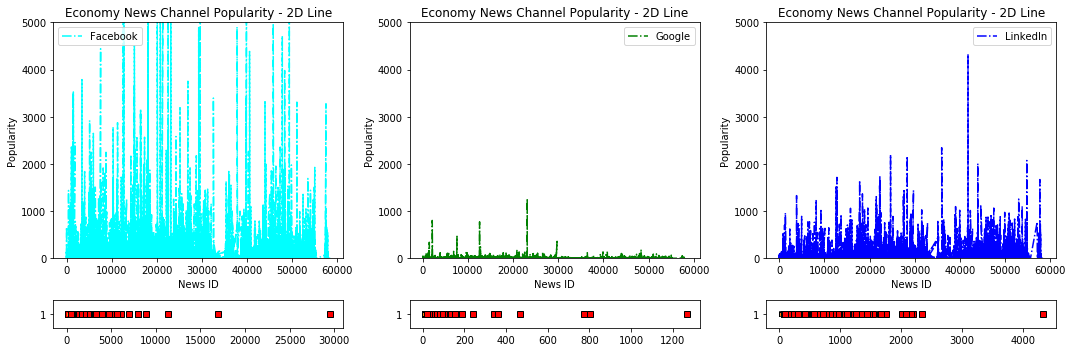

In [143]:
# Replot the 2D graph again, with the new dataset

plt.rcParams.update({'figure.autolayout': True})
 
plt.close('all')
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((5, 3), (0, 0), rowspan=4)
ax2 = plt.subplot2grid((5, 3), (0, 1), rowspan=4)
ax3 = plt.subplot2grid((5, 3), (0, 2), rowspan=4)
ax4 = plt.subplot2grid((5, 3), (4, 0), rowspan=1)
ax5 = plt.subplot2grid((5, 3), (4, 1), rowspan=1)
ax6 = plt.subplot2grid((5, 3), (4, 2), rowspan=1)

plot_custom_2d_chart(ax1, news_ids2, facebook_popularity2, 'Facebook', 'cyan', 5000)
plot_custom_2d_chart(ax2, news_ids2, google_popularity2, 'Google', 'green', 5000)
plot_custom_2d_chart(ax3, news_ids2, linkedin_popularity2, 'LinkedIn', 'blue', 5000)

plot_custom_box_chart(ax4, facebook_popularity2)
plot_custom_box_chart(ax5, google_popularity2)
plot_custom_box_chart(ax6, linkedin_popularity2)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [137]:
count_less_100 = filter_by_1_column_less_equals(economy_news_filtered, header.index('Facebook'), 100)
print("Articles with less than 100 likes:")
print("All FB      :", len(facebook_popularity))
print("All -0 & -1 :", len(facebook_popularity2))
print("All < 100   :", len(count_less_100))

count_less_10 = filter_by_1_column_less_equals(economy_news_filtered, header.index('Facebook'), 30)
print("\nArticles with less than 30 likes:")
print("All FB      :", len(facebook_popularity))
print("All -0 & -1 :", len(facebook_popularity2))
print("All < 30    :", len(count_less_10))

Articles with less than 100 likes:
All FB      : 33928
All -0 & -1 : 7089
All < 100   : 5402

Articles with less than 30 likes:
All FB      : 33928
All -0 & -1 : 7089
All < 30    : 3599


__My Observation:__
- Looking at the BoxPlot median value still looks bad.  It appears to be because too many unpopular new articles.
- Looking at the 2D chart:
    - we can conclude that Facebook gets better end user engagement than rest of platforms.
- Next step, lets replot Facebook with full y-limits.

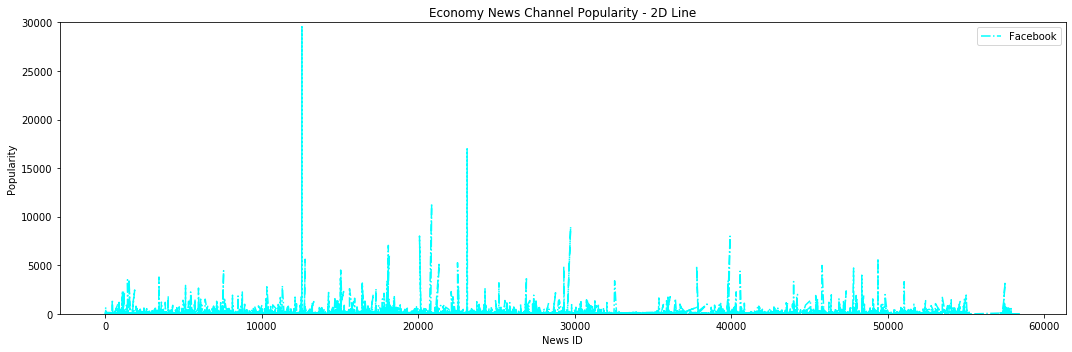

In [128]:
# Replot the 2D graph again, with the new dataset
plt.rcParams.update({'figure.autolayout': True})
 
plt.close('all')
fig1, ax1 = plt.subplots(figsize=(15,5))
plot_custom_2d_chart(ax1, news_ids2, facebook_popularity2, 'Facebook', 'cyan', 30000)

plt.show()

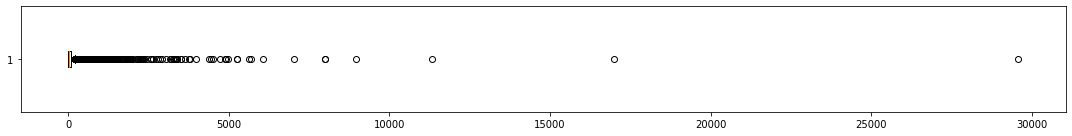

In [149]:
# Replot the Boxplot graph again, with the new dataset
plt.close('all')
fig1, ax1 = plt.subplots(figsize=(15,2))
ax1.boxplot(facebook_popularity2, notch=False, vert=False)

plt.show()

In [209]:
# Lets capture mean, median, mode for FB Popularity data

fb_mean = stats.mean(facebook_popularity2)
fb_median = stats.median(facebook_popularity2)
fb_mode = stats.mode(facebook_popularity2)
fb_std = stats.stdev(facebook_popularity2)

print("Key Statistics:\n")
print("{0:^10} {1:^10} {2:^10} {3:^10} {4:^20}".format("Platform", "Mean", "Median", "Mode", "Standard Deviation"))
print("{0:->10} {1:->10} {2:->10} {3:->10} {4:->20}".format("", "", "", "", ""))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("Facebook", fb_mean, fb_median, fb_mode, fb_std))

Key Statistics:

 Platform     Mean      Median      Mode     Standard Deviation 
---------- ---------- ---------- ---------- --------------------
Facebook       140.59      30.00       2.00     588.24


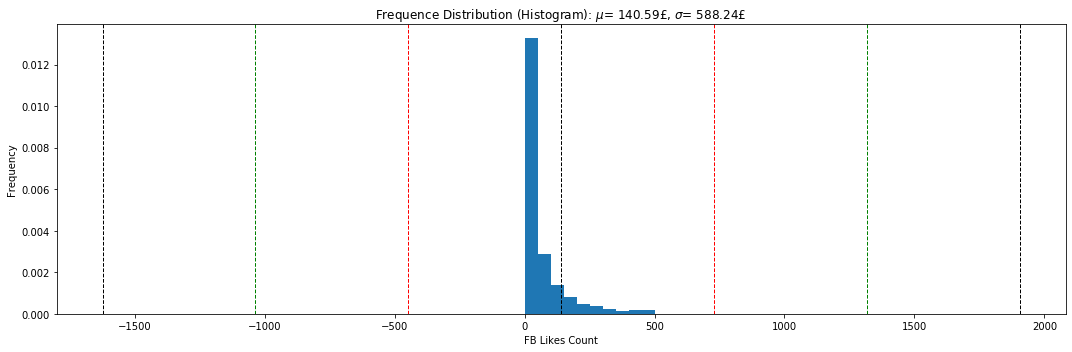

In [159]:
# Lets plot normal distribution for FB Popularity data

plt.close()

mu = fb_mean
sigma = fb_std

plt.rcParams.update({'figure.autolayout': True})
fig1, ax1 = plt.subplots(figsize=(15, 5))
num_bins = 20
n, bins, patches = ax1.hist(facebook_popularity2, bins=num_bins, density=1, range=(-500, 500))

ax1.set_title(r'Frequence Distribution (Histogram): $\mu$={:7.2f}£, $\sigma$={:7.2f}£'.format(mu, sigma))
ax1.set_xlabel("FB Likes Count")
ax1.set_ylabel("Frequency")

ax1.axvline(mu+sigma, color='red', linestyle='dashed', linewidth=1)
ax1.axvline(mu-sigma, color='red', linestyle='dashed', linewidth=1)
ax1.axvline(mu+sigma*2, color='green', linestyle='dashed', linewidth=1)
ax1.axvline(mu-sigma*2, color='green', linestyle='dashed', linewidth=1)
ax1.axvline(mu+sigma*3, color='black', linestyle='dashed', linewidth=1)
ax1.axvline(mu-sigma*3, color='black', linestyle='dashed', linewidth=1)
ax1.axvline(mu, color='k', linestyle='dashed', linewidth=1)

#plt.grid(True)
plt.show()

In [210]:
# Compare mean, median, mode across platform

print("Key Statistics Compared across platforms:\n")
print("{0:^10} {1:^10} {2:^10} {3:^10} {4:^20}".format("Platform", "Mean", "Median", "Mode", "Standard Deviation"))
print("{0:->10} {1:->10} {2:->10} {3:->10} {4:->20}".format("", "", "", "", ""))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("Facebook", fb_mean, fb_median, fb_mode, fb_std))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("GooglePlus", 
                                                              stats.mean(google_popularity2), 
                                                              stats.median(google_popularity2), 
                                                              stats.mode(google_popularity2), 
                                                              stats.stdev(google_popularity2)))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("LinkedIn", 
                                                              stats.mean(linkedin_popularity2), 
                                                              stats.median(linkedin_popularity2), 
                                                              stats.mode(linkedin_popularity2), 
                                                              stats.stdev(linkedin_popularity2)))


Key Statistics Compared across platforms:

 Platform     Mean      Median      Mode     Standard Deviation 
---------- ---------- ---------- ---------- --------------------
Facebook       140.59      30.00       2.00     588.24
GooglePlus       6.69       2.00       1.00      24.92
LinkedIn        56.90      13.00       1.00     155.35


__Step3:__
- Find top 10 popular news articles

In [196]:
def get_sorted_by_value(some_dict:dict, column=1, reverse=False):
    return sorted(some_dict.items(), key=lambda kv: kv[column], reverse=reverse)

def generate_article_master(news)->dict:
    articles = {}
    for news_item in news:
        articles[news_item[header.index('IDLink')]] = news_item[header.index('Title')]
    return articles

def generate_fb_likes(news)->list:
    likes = {}
    for news_item in news:
        likes[news_item[header.index('IDLink')]] = news_item[header.index('Facebook')]
    return get_sorted_by_value(likes, 1, True)  ### return list sorted desc by fb likes count

def generate_dict_for_column(news, column)->dict:
    recs = {}
    for news_item in news:
        recs[news_item[header.index('IDLink')]] = news_item[column]
    return recs

In [199]:
articles = generate_article_master(economy_news_filtered)
fb_likes = generate_fb_likes(economy_news_filtered)

print("Top 10 News Articles based on Facebook Platform:\n")
print("{0:>7} {1:>8} {2:^60}".format("NewsID", "FBLikes", "Title"))
print("{0:->7} {1:->8} {2:-^80}".format("", "", ""))
for i in range(10):
    print("{0:7d} {1:8d} {2:80}".format(fb_likes[i][0], fb_likes[i][1], articles[fb_likes[i][0]]))


Top 10 News Articles based on Facebook Platform:

 NewsID  FBLikes                            Title                            
------- -------- --------------------------------------------------------------------------------
  12561    29564 For the Wealthiest, a Private Tax System That Saves Them Billions               
  23117    16993 Under Sanders, income and jobs would soar, economist says                       
  20851    11336 Venezuela is on the brink of a complete economic collapse                       
  29734     8950 Revealed: the 30-year economic betrayal dragging down ...                       
  20075     8010 Sinking economy may lead to Trudeau ouster: O'Leary                             
  39921     7997 The Panama Papers Could Lead to Capitalism's Great Crisis                       
  18082     7045 More plastic than fish in oceans by 2050                                        
  18148     6056 The Oceans Will Contain More Plastic Than Fish by 2050                 

In [205]:
# Now compare FB top 10 articles with other Platforms on user engagement 

gp_likes = generate_dict_for_column(economy_news_filtered, header.index('GooglePlus'))
li_likes = generate_dict_for_column(economy_news_filtered, header.index('LinkedIn'))

print("Top 10 News Articles - Facebook Platform compared to Other platforms:\n")
print("{0:>7} {1:>8} {2:>8} {3:>8} {4:^60}".format("NewsID", "FBLikes", "GPLikes", "LILikes", "Title"))
print("{0:->7} {1:->8} {2:->8} {3:->8} {4:->80}".format("", "", "", "", ""))
for i in range(10):
    print("{0:7d} {1:8d} {2:8d} {3:8d} {4:80}".format(fb_likes[i][0], fb_likes[i][1], 
                                                      gp_likes[fb_likes[i][0]],
                                                      li_likes[fb_likes[i][0]],
                                                      articles[fb_likes[i][0]]))

Top 10 News Articles - Facebook Platform compared to Other platforms:

 NewsID  FBLikes  GPLikes  LILikes                            Title                            
------- -------- -------- -------- --------------------------------------------------------------------------------
  12561    29564      774     1514 For the Wealthiest, a Private Tax System That Saves Them Billions               
  23117    16993     1267      455 Under Sanders, income and jobs would soar, economist says                       
  20851    11336      182      243 Venezuela is on the brink of a complete economic collapse                       
  29734     8950      361     1444 Revealed: the 30-year economic betrayal dragging down ...                       
  20075     8010       10       16 Sinking economy may lead to Trudeau ouster: O'Leary                             
  39921     7997      137      597 The Panama Papers Could Lead to Capitalism's Great Crisis                       
  18082     7045     

__Step4:__
- Prove that Facebook has better engagement by taking random 100 samples across ~7K dataset

In [214]:
import random
random.seed(1234567890) # to make it repeatable with same values
sample_size = 100

In [217]:
#Sample iteration #1
sample1_100 = random.sample(economy_news_filtered, sample_size)

sample1_facebook = get_list_column(sample1_100, header.index('Facebook'))
sample1_google = get_list_column(sample1_100, header.index('GooglePlus'))
sample1_linkedin = get_list_column(sample1_100, header.index('LinkedIn'))

print("Key Statistics Compared across platforms - Sample#1:\n")
print("{0:^10} {1:^10} {2:^10} {3:^10} {4:^20}".format("Platform", "Mean", "Median", "Mode", "Standard Deviation"))
print("{0:->10} {1:->10} {2:->10} {3:->10} {4:->20}".format("", "", "", "", ""))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("Facebook", 
                                                              stats.mean(sample1_facebook), 
                                                              stats.median(sample1_facebook), 
                                                              stats.mode(sample1_facebook), 
                                                              stats.stdev(sample1_facebook)))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("GooglePlus", 
                                                              stats.mean(sample1_google), 
                                                              stats.median(sample1_google), 
                                                              stats.mode(sample1_google), 
                                                              stats.stdev(sample1_google)))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("LinkedIn", 
                                                              stats.mean(sample1_linkedin), 
                                                              stats.median(sample1_linkedin), 
                                                              stats.mode(sample1_linkedin), 
                                                              stats.stdev(sample1_linkedin)))

Key Statistics Compared across platforms - Sample#1:

 Platform     Mean      Median      Mode     Standard Deviation 
---------- ---------- ---------- ---------- --------------------
Facebook       136.32      37.00       4.00     323.35
GooglePlus       7.50       3.00       1.00      15.65
LinkedIn        63.69      13.00       1.00     173.10


In [219]:
#Sample iteration #2
sample2_100 = random.sample(economy_news_filtered, sample_size)

sample2_facebook = get_list_column(sample2_100, header.index('Facebook'))
sample2_google = get_list_column(sample2_100, header.index('GooglePlus'))
sample2_linkedin = get_list_column(sample2_100, header.index('LinkedIn'))

print("Key Statistics Compared across platforms - Sample#2:\n")
print("{0:^10} {1:^10} {2:^10} {3:^10} {4:^20}".format("Platform", "Mean", "Median", "Mode", "Standard Deviation"))
print("{0:->10} {1:->10} {2:->10} {3:->10} {4:->20}".format("", "", "", "", ""))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("Facebook", 
                                                              stats.mean(sample2_facebook), 
                                                              stats.median(sample2_facebook), 
                                                              stats.mode(sample2_facebook), 
                                                              stats.stdev(sample2_facebook)))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("GooglePlus", 
                                                              stats.mean(sample2_google), 
                                                              stats.median(sample2_google), 
                                                              stats.mode(sample2_google), 
                                                              stats.stdev(sample2_google)))
print("{0:10} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f}".format("LinkedIn", 
                                                              stats.mean(sample2_linkedin), 
                                                              stats.median(sample2_linkedin), 
                                                              stats.mode(sample2_linkedin), 
                                                              stats.stdev(sample2_linkedin)))

Key Statistics Compared across platforms - Sample#2:

 Platform     Mean      Median      Mode     Standard Deviation 
---------- ---------- ---------- ---------- --------------------
Facebook       171.15      39.50       3.00     548.82
GooglePlus       4.92       3.00       1.00       8.61
LinkedIn        57.90      15.50       1.00     111.62


### Final Conclusion:
- Based on the provided dataset, user engagement is higher at Facebook compared to other platforms